#Exploratry data analysis on ADANIPORTS  datasets


TODO- To talk about the dataset and EDA
      source-kaggle.
      
      Information about adaniports stock data


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chiragkumarprajapat
Your Kaggle Key: ··········


 33%|███▎      | 6.00M/18.4M [00:00<00:00, 58.3MB/s]

100%|██████████| 18.4M/18.4M [00:00<00:00, 42.5MB/s]


In [51]:
data_file="./nifty50-stock-market-data/AXISBANK.csv"

Data preparation and cleaning
1. Loading file using pandas
2. We will see some info about data
3. If there any incorrect value or missing value will fix that

In [52]:
#importing libraries
import pandas as pd


In [53]:
#reading the data into dataframes
df= pd.read_csv(data_file)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


In [54]:
#columns on which we are working in
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [55]:
#some more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [56]:
#through this command we can see the mean, max, min and other details
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [57]:
numerical_datatype=['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerical_datatype)
len(numeric_df.columns)

12

Percentage of missing values in data


In [58]:
#searching for missing value in percentage
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

Trades                0.537128
%Deliverble           0.095929
Deliverable Volume    0.095929
Turnover              0.000000
Volume                0.000000
VWAP                  0.000000
Close                 0.000000
Last                  0.000000
Low                   0.000000
High                  0.000000
Open                  0.000000
Prev Close            0.000000
Series                0.000000
Symbol                0.000000
Date                  0.000000
dtype: float64

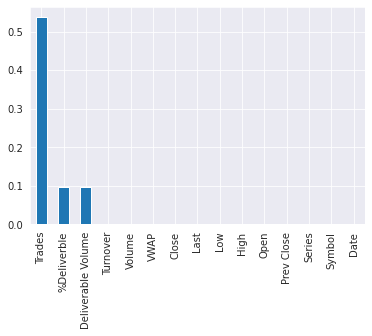

In [59]:
#missing value percentage using barchart
missing_percentage.plot(kind='bar')

EXPLORATRY ANALYSIS AND VISUALIZATION

Columns which are going to be analyzed:
1. Volume
2. Trades
3. Turnover
4. Date for analysing over year analysis
5. High and Low


In [60]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [61]:
a=df.Series.unique()
len(a)

1

#Volume

In [62]:
#importing seaborn libaray for better visualization of data
import seaborn as sns
sns.set_style("darkgrid")

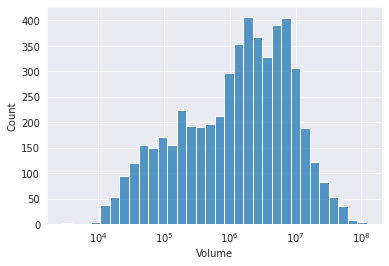

In [63]:
#volume column histogram represents most of the volume of comapny is between 10^4 to 10^7
sns.histplot(df.Volume, log_scale=True)

In [64]:
volumes=df.Volume.value_counts()
len(volumes)

5302

In [70]:
#checking for higher volumes and lower volumes that company got
high_volume=df.Volume[df.Volume>=10000000]
low_volume=df.Volume[df.Volume<100000]

In [71]:
len(high_volume)/len(volumes)

0.11731422104866088

In [72]:
len(low_volume)/len(volumes)

0.13994718973972087

#Trades

In [82]:
df.Trades.fillna(0).astype(int)

0            0
1            0
2            0
3            0
4            0
         ...  
5301    286480
5302    289445
5303    507747
5304    312079
5305    232879
Name: Trades, Length: 5306, dtype: int64

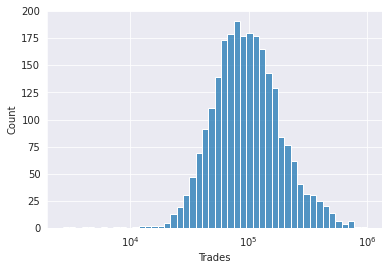

In [85]:
#Trades column histogram represents most of the trades of comapny is between 10^4 to 10^6
sns.histplot(df.Trades, log_scale=True)


In [86]:
Trades_count=df.Trades.value_counts()
len(Trades_count)

2443

In [87]:
high_trades=df.Trades[df.Trades>=700000]
low_trades=df.Trades[df.Trades<10000]

In [88]:
len(high_trades)/len(Trades_count)

0.003274662300450266

In [89]:
len(low_trades)/len(Trades_count)

0.0028653295128939827

#TURNOVER

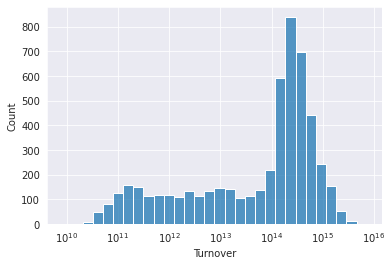

In [90]:
#visualization of turnover of the company
sns.histplot(df.Turnover, log_scale=True)

In [91]:
highest_turnover=df.Trades.max()
highest_turnover

990737.0

In [92]:
lowest_turnover=df.Trades.min()
lowest_turnover

2698.0

#DATE

In [93]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekdays'] = df['Date'].dt.dayofweek
df['Months'] = df['Date'].dt.strftime('%b')

In [94]:
#sns.histplot(df.Months, bins=12, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


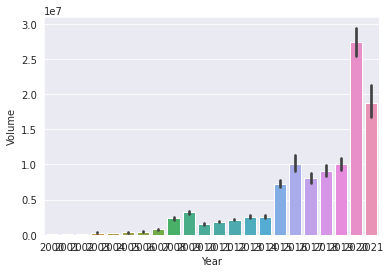

In [95]:
#volumes vs years chart
sns.barplot(df.Year,df.Volume)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


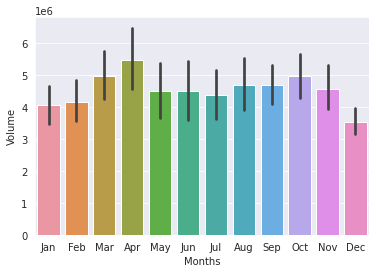

In [96]:
#volumes vs months chart
sns.barplot(df.Months,df.Volume)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


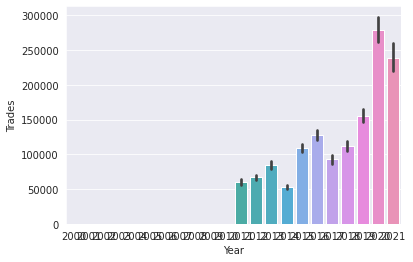

In [97]:
#Trades vs years chart
sns.barplot(df.Year,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


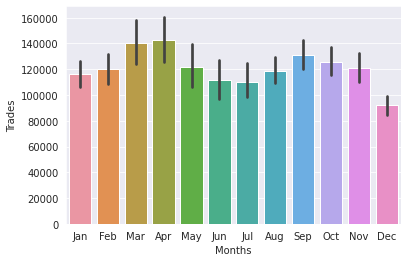

In [98]:
#Trades vs months chart
sns.barplot(df.Months,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


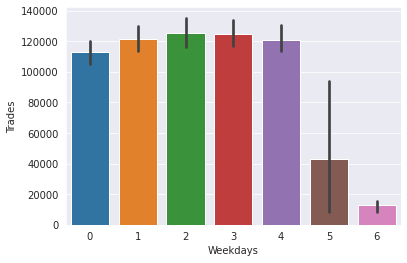

In [99]:
#Trades vs weekdays chart
sns.barplot(df.Weekdays,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


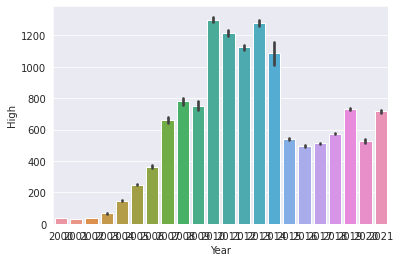

In [100]:
#highest opening price of day over year analysis
sns.barplot(df.Year,df.High)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


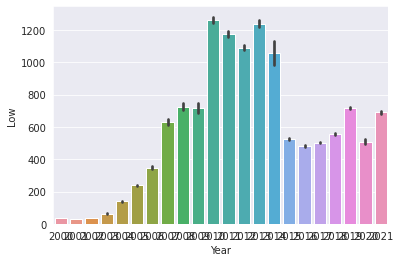

In [101]:
#lowest opening price of day over year analysis
sns.barplot(df.Year,df.Low)

#RESULTS

Questions that came during analysis

1. which is the most trading day?
2. which month we had seen trading all time high?
3. what is the trend of trading year over year?
2. what is the highest and lowest turnover?
3. highest and lowest volume days?


SUMMARY AND CONCLUSION

Insights:

*   The days when volume was greater than 10,00,0000 on basis of everdays volume is 11.73%.
*   The days when volume was less than 1,00,000 on basis of everdays volume is 13.99%.
*   The days when No. of trades was greater than 7,00,000 on basis of everdays is 0.3%.
*   The days when No. of trades was less than 10,000 on basis of everdays is 0.2%.
*   Usually after analysis we can say most trading days are from monday to friday. There is usually less or no to trading on saturdays and sundays.
*   We have seen the most trading on basis of months after the analysis is almost equal for all months or we can say that small difference will be there.
*   Talking about the trend of trading on basis of years, we can say that it has only increasd and for till now with analysis we can say that 2020 year is the most trading year.
*   Highest turnover of the company = 990737.0
*   Lowest turnover of the company = 2698.0
*  Talking about volume, company has as increasd it year over year and from analysis we can say 2020 has the most of it.
*   All months are mostly happening month for volumes of the company.Still we can say April is best.
*   Highest opening price and lowest opening price of the years was between 2010-2020.














